In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
data_loaded = pd.read_hdf('summary.h5')

In [5]:
name_dict = {'parallax  best18k': 'parallax best 18k',
            'properMotion  best18k': 'proper motion best 18k',
            'MicrolensingMetric_detect tE 5_10 days Fraction detected of total (mean)': '5-10d microlensing\ndetection',
            'MicrolensingMetric_detect tE 60_90 days Fraction detected of total (mean)': '60-90d microlensing\ndetection',
            'fO  fONv MedianNvis': 'fO N vis',
            'SNNSNMetric_nSN DDF excluded Total detected': 'SNe, N',
             'SNNSNMetric_zlim DDF excluded Median': 'SNe, zlim',
            'ExgalM5_with_cuts i band non-DD year 10 3x2ptFoM': '3x2 i-band',
            'WeakLensingNvisits gri band non-DD Median': 'WL Nvis i-band',
            'PrestoKNe__scoreS  Sum': 'KNe Presto S',
            'XRBPopMetric__early_detect  Total detected': 'XRB\nearly detect',
            'Brown Dwarf, L7  VolumeSum': 'Brown Dwarf Vol',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 16.000000': 'NEO bright',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 22.000000': 'NEO faint',
            'Discovery_N_Chances TNO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 6.000000': 'TNO'}
invert_cols = ['parallax best 18k', 'proper motion best 18k']
mag_cols = ['5-10d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'CoaddM5 g Median': 'g',
 'CoaddM5 i Median': 'i',
 'CoaddM5 r Median': 'r',
 'CoaddM5 u Median': 'u',
 'CoaddM5 y Median': 'y',
 'CoaddM5 z Median': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    

KeyError: 'SNNSNMetric_nSN DDF excluded Total detected'

In [ ]:
data

In [6]:
mag_data

,g,i,r,u,y,z
supress_off_v2.99_10yrs,26.690296,26.270509,26.807070,25.670865,24.74528,25.541021
supress_on_v2.99_10yrs,26.691067,26.266481,26.796821,25.671016,24.74260,25.536234


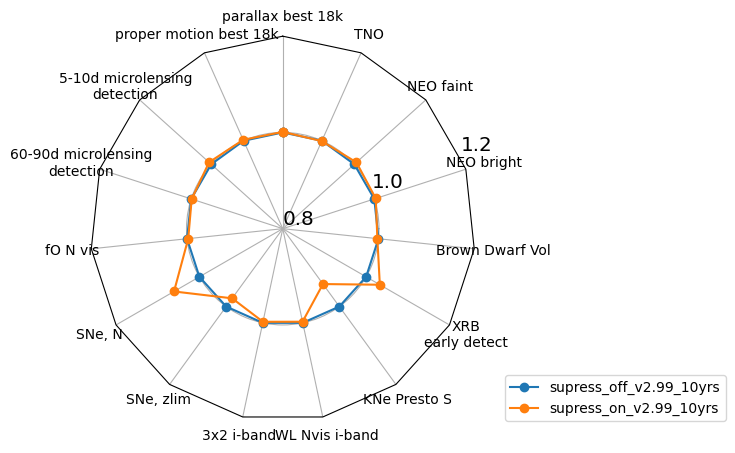

In [7]:
runs = [run for run in data.index ]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='supress_off_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

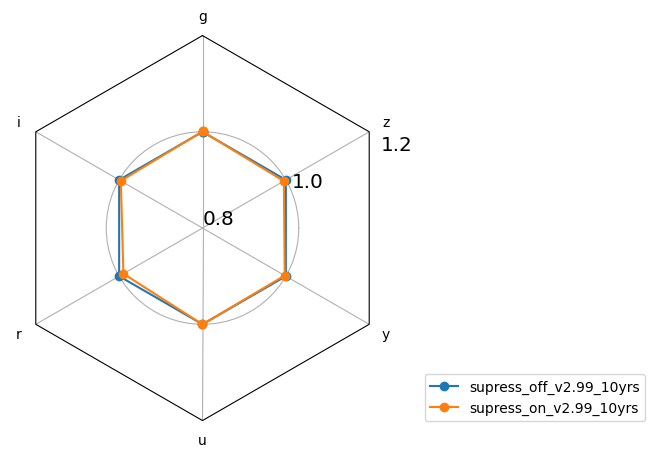

In [8]:
ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='supress_off_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [9]:
data_loaded['DD:ELAISS1 NVisits all bands Median']

supress_off_v2.99_10yrs    11416.0
supress_on_v2.99_10yrs     11466.0
Name: DD:ELAISS1 NVisits all bands Median, dtype: float64

In [10]:
data_loaded['DD:COSMOS NVisits all bands Median']


supress_off_v2.99_10yrs    20622.0
supress_on_v2.99_10yrs     20739.5
Name: DD:COSMOS NVisits all bands Median, dtype: float64

In [11]:
ack = [col for col in data_loaded.columns if 'Discovery_N_Chances' in col and '3 pairs in 15 nights SNR=3' in col
and 'CumulativeCompleteness H <= 18.0' in col]

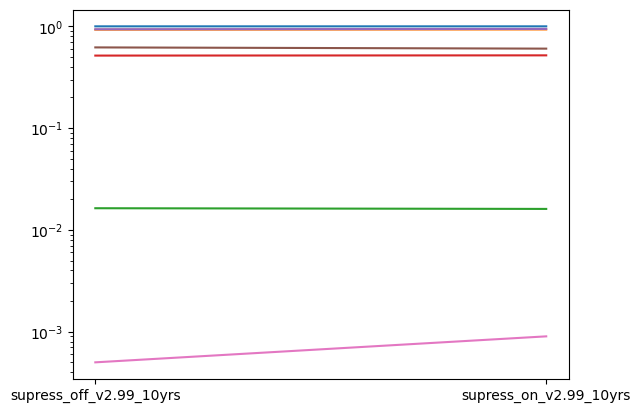

In [12]:

data_loaded[ack]
_temp = plt.semilogy(data_loaded[ack])

In [13]:
ack = [col for col in data_loaded.columns if 'Discovery_N_Chances' in col and '3 pairs in 15 nights SNR=3' in col
and 'CumulativeCompleteness H <= 8.0' in col]
data_loaded[ack]

,Discovery_N_Chances OCC_r20 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 8.000000,Discovery_N_Chances OCC_r5 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 8.000000,Discovery_N_Chances TNO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 8.000000
supress_off_v2.99_10yrs,0.8542,0.9356,0.562690
supress_on_v2.99_10yrs,0.8544,0.9374,0.561043


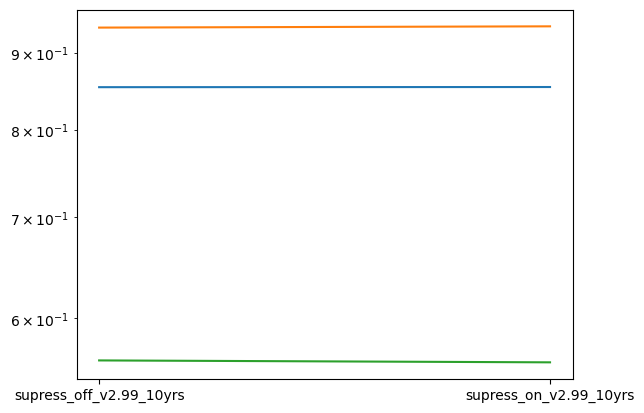

In [14]:
_temp = plt.semilogy(data_loaded[ack])

In [15]:
ack = [col for col in data_loaded.columns if 'KNe' in col]

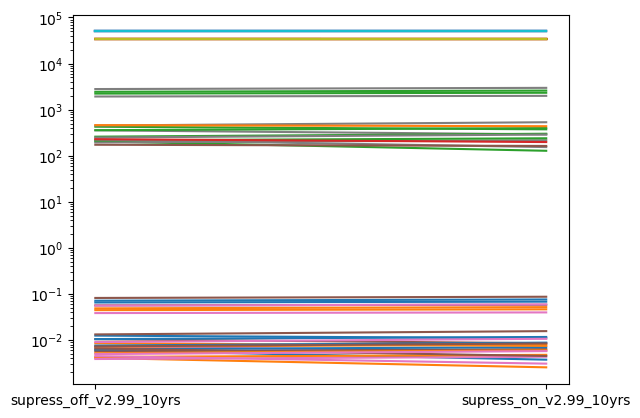

In [16]:
_temp = plt.semilogy(data_loaded[ack])

In [26]:
ack = [col for col in data_loaded.columns if 'Discovery_N_Chances Vatira' in col 
 and '1 quad in 1 night detection loss' in col
and 'CumulativeCompleteness H <= ' in col]
data_loaded[ack]

,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 16.000000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 16.200000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 16.400000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 16.600000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 16.800000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 17.000000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 17.200000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 17.400000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 17.600000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 17.800000,...,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 26.200000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 26.400000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 26.600000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 26.800000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 27.000000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 27.200000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 27.400000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 27.600000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 27.800000,Discovery_N_Chances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 28.000000
supress_off_v2.99_10yrs,0.0437,0.0437,0.0437,0.0437,0.0437,0.0437,0.0437,0.0437,0.0437,0.0437,...,0.000527,0.000453,0.000389,0.000334,0.000287,0.000246,0.000212,0.000182,0.000156,0.000134
supress_on_v2.99_10yrs,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,...,0.000449,0.000385,0.000331,0.000284,0.000244,0.000210,0.000180,0.000155,0.000133,0.000114


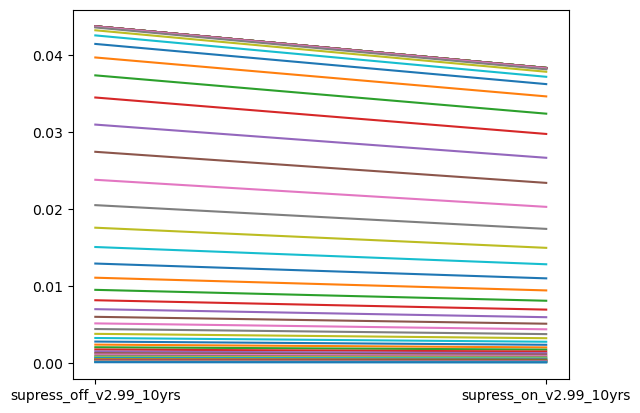

In [32]:
_temp = plt.plot(data_loaded[ack])